In [ ]:
!nvidia-smi
!gcc --version
!nvcc --version

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
!rm -rf /content/drive/MyDrive/yolo_transfer_model/darknet
os.mkdir('/content/drive/MyDrive/yolo_transfer_model/darknet')


In [ ]:
!git clone 'https://github.com/pjreddie/darknet.git' '/content/drive/MyDrive/yolo_transfer_model/darknet'

In [ ]:
%cd /content/drive/MyDrive/yolo_transfer_model/darknet


[Errno 2] No such file or directory: '/content/drive/MyDrive/yolo_transfer_model/darknet'
/content


In [ ]:
!ls

In [ ]:
!make

In [ ]:
!make clean
!make

In [ ]:
!python custom_data/creating-files-data-and-name.py

In [ ]:
!python custom_data/creating-train-and-test-txt-files.py

In [ ]:
%cd /content/drive/MyDrive/yolo_transfer_model

In [ ]:
!darknet/darknet

In [ ]:
!darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/yolov3_custom.cfg custom_weight/darknet53.conv.74 -dont_show  
#!darknet/darknet detector test custom_data/labelled_data.data darknet/cfg/yolov3_custom.cfg backup/yolov3_custom_final.weights

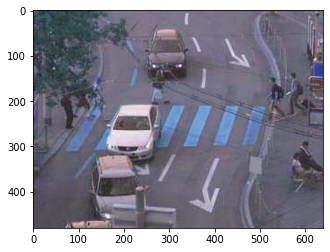

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Pretrained model
net = cv2.dnn.readNetFromDarknet("/content/drive/MyDrive/yolo_transfer_model/darknet/cfg/yolov3_custom.cfg", r"/content/drive/MyDrive/yolo_transfer_model/backup/yolov3_custom_final.weights")
classes=['person']

my_img=cv2.imread('/content/drive/MyDrive/CROSSING_SEQUENCES/Annotatedonlyseq2/3300.jpg')
plt.imshow(my_img)

In [ ]:


ht, wt, _= my_img.shape
blob=cv2.dnn.blobFromImage(my_img,1/255,(608,608),(0,0,0),swapRB=True, crop=False)
net.setInput(blob)

last_layer=net.getUnconnectedOutLayers()
layer_out=net.forward(last_layer)

In [ ]:
layer_out[0][0]

array([0.00665996, 0.00458126, 0.03254456, 0.02794211, 0.06625067,
       0.        ], dtype=float32)

In [ ]:
boxes=[]
confidences=[]
class_ids=[]

for output in layer_out:
  for detection in output:
    score=detection[5:]
    class_id=np.argmax(score)
    #print(class_id)
    confidence=score[class_id]
    if confidence > 0.5:
      center_x=int(detection[0]*wt)
      center_y=int(detection[1]*ht)
      w=int(detection[2]*wt)
      h=int(detection[3]*ht)
      x= int(center_x-w/2)
      y= int(center_y+h/2)
      #x= int(center_x)
      #y= int(center_y)
      boxes.append([x,y,w,h])
      confidences.append((float(confidence)))
      class_ids.append(class_id)

In [ ]:
confidences

[0.5439947843551636,
 0.5037028193473816,
 0.532829999923706,
 0.5162378549575806,
 0.5058068037033081]

In [ ]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences, 0.5, 0.4)
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0, 255, size=(len(boxes),3))


In [ ]:
boxes

[[149, 85, 28, 54],
 [101, 165, 6, 7],
 [202, 265, 30, 11],
 [177, 1140, 1, 1676],
 [583, 420, 3, 163]]

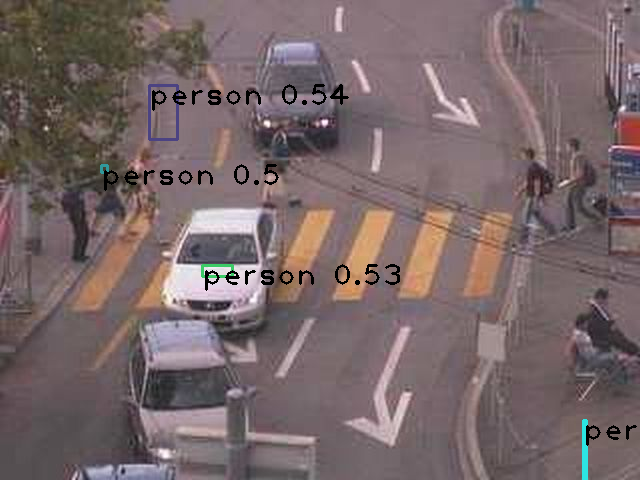

In [ ]:
from google.colab.patches import cv2_imshow
for i in indexes.flatten():
  x,y,w,h=boxes[i]
  label=str(classes[class_ids[i]])
  confidence=str(round(confidences[i],2))
  color=colors[i]
  cv2.rectangle(my_img,(x,y),(x+w,y+h),color,2)
  cv2.putText(my_img, label+ " "+confidence, (x,y+20),font,2,(0,0,0),2)

cv2_imshow(my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [ ]:
!python /content/drive/MyDrive/yolo_transfer_model/confusion/Object-Detection-Metrics-master

In [ ]:
!python /content/drive/MyDrive/yolo_transfer_model/confusion/Object-Detection-Metrics-master/pascalvoc.py

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Pretrained model
net = cv2.dnn.readNetFromDarknet("/content/drive/MyDrive/yolo_transfer_model/darknet/cfg/yolov3.cfg", r"/content/drive/MyDrive/yolo_pretrained/yolov3.weights")
classes=[]
%cd /content/drive/MyDrive/yolo_pretrained
with open('coco.names','r') as f:
 classes=[line.strip() for line in f.readlines()]
import os 
import glob 
img_dir = "/content/drive/MyDrive/CROSSING_SEQUENCES/data/images/seq1/dataset" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
%cd /content/drive/MyDrive/yolo_transfer_model/confusion/Object-Detection-Metrics-master/detections
for file_name in os.listdir(img_dir):
    fname=os.path.splitext(file_name)[0]
    t_name ='{0}.txt'.format(fname)
    with open(t_name, 'w') as f:
     im=os.path.join(img_dir,file_name)
     my_img=cv2.imread(im)
     ht, wt, _= my_img.shape
     blob=cv2.dnn.blobFromImage(my_img,1/255,(608,608),(0,0,0),swapRB=True, crop=False)
     net.setInput(blob)
     last_layer=net.getUnconnectedOutLayers()
     layer_out=net.forward(last_layer)
     boxes=[]
     confidences=[]
     class_ids=[]
     for output in layer_out:
      for detection in output:
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        if confidence > 0.3:
         center_x=int(detection[0]*wt)
         center_y=int(detection[1]*ht)
         w=int(detection[2]*wt)
         h=int(detection[3]*ht)
         #x= int(center_x-w/2)
         #y= int(center_y+h/2)
         f.writelines('person'+' '+str(confidence)+' '+str(center_x)+' '+str(center_y)+' '+str(w)+' '+str(h)+'\n') 
         
       
          
          

In [ ]:
#Preparing annotation file format
import csv
import math
w=640
h=480
with open('/content/drive/MyDrive/CROSSING_SEQUENCES/pedxing-seq2-annot.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    %cd /content/drive/MyDrive/CROSSING_SEQUENCES/yolo_seq2
    for row in reader:
        #print(row)                              #you can remove this, see below
        file_name ='{0}.txt'.format(row['image']) 
        with open(file_name, 'w') as f:
         x_centre=(int(row['xmin'])+int(row['xmax']))/2
         y_centre=(int(row['ymin'])+int(row['ymax']))/2
         width=int(row['xmax'])-int(row['xmin'])
         height=int(row['ymax'])-int(row['ymin'])
         rowtext=['0',' ',str(round(x_centre/w,3)),' ',str(round(y_centre/h,3)),' ',str(abs(round(width/w,3))),' ',str(abs(round(height/h,3))),'\n']
         f.writelines(rowtext)
         if row['xmin2']:
          x_centre=(int(row['xmin2'])+int(row['xmax2']))/2
          y_centre=(int(row['ymin2'])+int(row['ymax2']))/2
          width=int(row['xmax2'])-int(row['xmin2'])
          height=int(row['ymax2'])-int(row['ymin2'])
          rowtext=['0',' ',str(round(x_centre/w,3)),' ',str(round(y_centre/h,3)),' ',str(abs(round(width/w,3))),' ',str(abs(round(height/h,3))),'\n']
          f.writelines(rowtext)
         if row['xmin3']:
          x_centre=(int(row['xmin3'])+int(row['xmax3']))/2
          y_centre=(int(row['ymin3'])+int(row['ymax3']))/2
          width=int(row['xmax3'])-int(row['xmin3'])
          height=int(row['ymax3'])-int(row['ymin3'])
          rowtext=['0',' ',str(round(x_centre/w,3)),' ',str(round(y_centre/h,3)),' ',str(abs(round(width/w,3))),' ',str(abs(round(height/h,3))),'\n']
          f.writelines(rowtext)
         if row['xmin4']:
          x_centre=(int(row['xmin4'])+int(row['xmax4']))/2
          y_centre=(int(row['ymin4'])+int(row['ymax4']))/2
          width=int(row['xmax4'])-int(row['xmin4'])
          height=int(row['ymax4'])-int(row['ymin4'])
          rowtext=['0',' ',str(round(x_centre/w,3)),' ',str(round(y_centre/h,3)),' ',str(abs(round(width/w,3))),' ',str(abs(round(height/h,3))),'\n']
          f.writelines(rowtext)
         if row['xmin5']:
          x_centre=(int(row['xmin5'])+int(row['xmax5']))/2
          y_centre=(int(row['ymin5'])+int(row['ymax5']))/2
          width=int(row['xmax5'])-int(row['xmin5'])
          height=int(row['ymax5'])-int(row['ymin5'])
          rowtext=['0',' ',str(round(x_centre/w,3)),' ',str(round(y_centre/h,3)),' ',str(abs(round(width/w,3))),' ',str(abs(round(height/h,3))),'\n']
          f.writelines(rowtext)
         
         if row['xmin6']:
          x_centre=(int(row['xmin6'])+int(row['xmax6']))/2
          y_centre=(int(row['ymin6'])+int(row['ymax6']))/2
          width=int(row['xmax6'])-int(row['xmin6'])
          height=int(row['ymax6'])-int(row['ymin6'])
          rowtext=['0',' ',str(round(x_centre/w,3)),' ',str(round(y_centre/h,3)),' ',str(abs(round(width/w,3))),' ',str(abs(round(height/h,3))),'\n']
          f.writelines(rowtext)
         if row['xmin7']:
          x_centre=(int(row['xmin7'])+int(row['xmax7']))/2
          y_centre=(int(row['ymin7'])+int(row['ymax7']))/2
          width=int(row['xmax7'])-int(row['xmin7'])
          height=int(row['ymax7'])-int(row['ymin7'])
          rowtext=['0',' ',str(round(x_centre/w,3)),' ',str(round(y_centre/h,3)),' ',str(abs(round(width/w,3))),' ',str(abs(round(height/h,3))),'\n']
          f.writelines(rowtext)
         if row['xmin8']:
          x_centre=(int(row['xmin8'])+int(row['xmax8']))/2
          y_centre=(int(row['ymin8'])+int(row['ymax8']))/2
          width=int(row['xmax8'])-int(row['xmin8'])
          height=int(row['ymax8'])-int(row['ymin8'])
          rowtext=['0',' ',str(round(x_centre/w,3)),' ',str(round(y_centre/h,3)),' ',str(abs(round(width/w,3))),' ',str(abs(round(height/h,3))),'\n']
          f.writelines(rowtext)
         if row['xmin9']:
          x_centre=(int(row['xmin9'])+int(row['xmax9']))/2
          y_centre=(int(row['ymin9'])+int(row['ymax9']))/2
          width=int(row['xmax9'])-int(row['xmin9'])
          height=int(row['ymax9'])-int(row['ymin9'])
          rowtext=['0',' ',str(round(x_centre/w,3)),' ',str(round(y_centre/h,3)),' ',str(abs(round(width/w,3))),' ',str(abs(round(height/h,3))),'\n']
         if row['xmin10']:
          x_centre=(int(row['xmin10'])+int(row['xmax10']))/2
          y_centre=(int(row['ymin10'])+int(row['ymax10']))/2
          width=int(row['xmax10'])-int(row['xmin10'])
          height=int(row['ymax10'])-int(row['ymin10'])
          rowtext=['0',' ',str(round(x_centre/w,3)),' ',str(round(y_centre/h,3)),' ',str(abs(round(width/w,3))),' ',str(abs(round(height/h,3))),'\n']
          f.writelines(rowtext)
         if row['xmin11']:
          x_centre=(int(row['xmin11'])+int(row['xmax11']))/2
          y_centre=(int(row['ymin11'])+int(row['ymax11']))/2
          width=int(row['xmax11'])-int(row['xmin11'])
          height=int(row['ymax11'])-int(row['ymin11'])
          rowtext=['0',' ',str(round(x_centre/w,3)),' ',str(round(y_centre/h,3)),' ',str(abs(round(width/w,3))),' ',str(abs(round(height/h,3))),'\n']
          f.writelines(rowtext)
'''
         if row['xmin12']:
          x_centre=(int(row['xmin12'])+int(row['xmax12']))/1280
          y_centre=(int(row['ymin12'])+int(row['ymax12']))/960
          width=(int(row['xmax12'])-int(row['xmin12']))/w
          height=(int(row['ymax12'])-int(row['ymin12']))/h
          rowtext=['0',' ',str(x_centre),' ',str(y_centre),' ',str(abs(width)),' ',str(abs(height)),'\n']
          f.writelines(rowtext)
         if row['xmin13']:
          x_centre=(int(row['xmin13'])+int(row['xmax13']))/1280
          y_centre=(int(row['ymin13'])+int(row['ymax13']))/960
          width=(int(row['xmax13'])-int(row['xmin13']))/w
          height=(int(row['ymax13'])-int(row['ymin13']))/h
          rowtext=['0',' ',str(x_centre),' ',str(y_centre),' ',str(abs(width)),' ',str(abs(height)),'\n']
          f.writelines(rowtext)
         if row['xmin14']:
          x_centre=(int(row['xmin14'])+int(row['xmax14']))/1280
          y_centre=(int(row['ymin14'])+int(row['ymax14']))/960
          width=(int(row['xmax14'])-int(row['xmin14']))/w
          height=(int(row['ymax14'])-int(row['ymin14']))/h
          rowtext=['0',' ',str(x_centre),' ',str(y_centre),' ',str(abs(width)),' ',str(abs(height)),'\n']
          f.writelines(rowtext)
         if row['xmin15']:
          x_centre=(int(row['xmin15'])+int(row['xmax15']))/1280
          y_centre=(int(row['ymin15'])+int(row['ymax15']))/960
          width=(int(row['xmax15'])-int(row['xmin15']))/w
          height=(int(row['ymax15'])-int(row['ymin15']))/h
          rowtext=['0',' ',str(x_centre),' ',str(y_centre),' ',str(abs(width)),' ',str(abs(height)),'\n']
          f.writelines(rowtext)
'''
         #f.writelines(rowtext+rowtext2+rowtext3+rowtext4+rowtext5+rowtext6+rowtext7+rowtext8+rowtext9+rowtext10+rowtext11+rowtext12+rowtext13+rowtext14+rowtext15)

/content/drive/MyDrive/CROSSING_SEQUENCES/yolo_seq2


"\n         if row['xmin12']:\n          x_centre=(int(row['xmin12'])+int(row['xmax12']))/1280\n          y_centre=(int(row['ymin12'])+int(row['ymax12']))/960\n          width=(int(row['xmax12'])-int(row['xmin12']))/w\n          height=(int(row['ymax12'])-int(row['ymin12']))/h\n          rowtext=['0',' ',str(x_centre),' ',str(y_centre),' ',str(abs(width)),' ',str(abs(height)),'\n']\n          f.writelines(rowtext)\n         if row['xmin13']:\n          x_centre=(int(row['xmin13'])+int(row['xmax13']))/1280\n          y_centre=(int(row['ymin13'])+int(row['ymax13']))/960\n          width=(int(row['xmax13'])-int(row['xmin13']))/w\n          height=(int(row['ymax13'])-int(row['ymin13']))/h\n          rowtext=['0',' ',str(x_centre),' ',str(y_centre),' ',str(abs(width)),' ',str(abs(height)),'\n']\n          f.writelines(rowtext)\n         if row['xmin14']:\n          x_centre=(int(row['xmin14'])+int(row['xmax14']))/1280\n          y_centre=(int(row['ymin14'])+int(row['ymax14']))/960\n        